In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from us import states
from zipfile import ZipFile
import os
import sys
from glob import glob
import json
from io import BytesIO

In [5]:
r = requests.get("https://data.nrel.gov/system/files/121/small_suitability.zip")

In [6]:
z = ZipFile(BytesIO(r.content))

In [65]:
z.extractall("../../data/spatial_data")

In [66]:
roof_gdf = gpd.read_file("../../data/spatial_data/small_suitability/opv_national_small_suitability.shp")

In [11]:
roof_gdf.head()

,fipsstco,zip,state_fips,zip_name,county,state,state_zip,zip_int,locale,nbld,pct_suitab,geometry
0,41035,97737,41,GILCHRIST,KLAMATH,OR,OR_97737,97737,City Small,30,0.827528,"POLYGON ((-121.55762 43.42257, -121.55732 43.4..."
1,41013,97752,41,POST,CROOK,OR,OR_97752,97752,Town Fringe,700,0.799901,"POLYGON ((-120.25104 44.4377, -120.24783 44.43..."
2,41013,97753,41,POWELL BUTTE,CROOK,OR,OR_97753,97753,Town Fringe,1271,0.814984,"POLYGON ((-121.10827 44.33769, -121.10822 44.3..."
3,41017,97756,41,REDMOND,DESCHUTES,OR,OR_97756,97756,Town Fringe,7648,0.809712,"POLYGON ((-121.10817 44.34245, -121.10818 44.3..."
4,41017,97759,41,SISTERS,DESCHUTES,OR,OR_97759,97759,Rural Fringe,1822,0.726288,"MULTIPOLYGON (((-121.77008 44.03068, -121.7682..."


In [27]:
armourdale = gpd.read_file("../../data/spatial_data/armourdale_shape.gpkg")

In [32]:
roof_gdf.loc[roof_gdf['county']=='wyandotte'.upper()]

,fipsstco,zip,state_fips,zip_name,county,state,state_zip,zip_int,locale,nbld,pct_suitab,geometry
8870,20209,66102,20,KANSAS CITY,WYANDOTTE,KS,KS_66102,66102,City Midsize,6553,0.667659,"MULTIPOLYGON (((-94.64517 39.09151, -94.6452 3..."
8871,20209,66104,20,KANSAS CITY,WYANDOTTE,KS,KS_66104,66104,City Midsize,7206,0.655492,"POLYGON ((-94.73651 39.16928, -94.73573 39.169..."
8872,20209,66105,20,KANSAS CITY,WYANDOTTE,KS,KS_66105,66105,City Midsize,1430,0.692308,"POLYGON ((-94.60721 39.0897, -94.60722 39.0874..."
8873,20209,66106,20,KANSAS CITY,WYANDOTTE,KS,KS_66106,66106,City Midsize,5688,0.666029,"MULTIPOLYGON (((-94.79281 39.04355, -94.7931 3..."
8874,20209,66109,20,KANSAS CITY,WYANDOTTE,KS,KS_66109,66109,Rural Fringe,6361,0.780883,"POLYGON ((-94.90053 39.18718, -94.90073 39.187..."
8875,20209,66111,20,KANSAS CITY,WYANDOTTE,KS,KS_66111,66111,Suburb Large,2983,0.764832,"POLYGON ((-94.7951 39.04352, -94.79694 39.0435..."
8876,20209,66112,20,KANSAS CITY,WYANDOTTE,KS,KS_66112,66112,City Midsize,2459,0.666267,"POLYGON ((-94.74978 39.12858, -94.7463 39.1290..."
9231,20209,66118,20,KANSAS CITY,WYANDOTTE,KS,KS_66118,66118,City Midsize,97,0.628866,"POLYGON ((-94.61523 39.11228, -94.6152 39.1122..."
9446,20209,66101,20,KANSAS CITY,WYANDOTTE,KS,KS_66101,66101,City Midsize,4286,0.747084,"POLYGON ((-94.61512 39.1137, -94.61512 39.1131..."
9447,20209,66103,20,KANSAS CITY,WYANDOTTE,KS,KS_66103,66103,City Midsize,4353,0.658397,"POLYGON ((-94.60732 39.0821, -94.60733 39.0819..."


<Axes: >

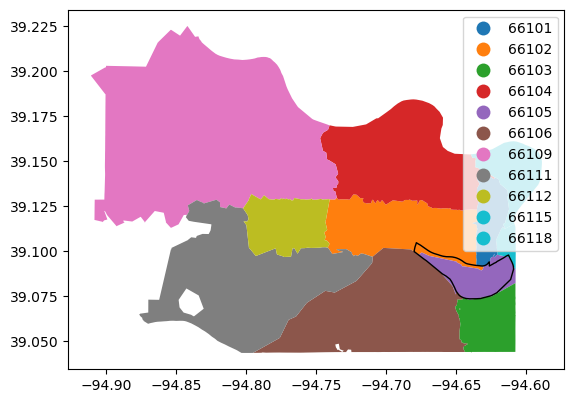

In [34]:
fig, ax = plt.subplots()
roof_gdf.loc[roof_gdf['county']=='wyandotte'.upper()].plot(ax=ax, column='zip', categorical=True, legend=True, )
                                                        #    legend_kwds=dict(label='Percent of suitable rooftops'))
armourdale.plot(ax=ax, fc='None', ec='k')

In [53]:
armourdale_buildings_res = gpd.read_file("../../data/spatial_data/armourdale/building_footprints.gpkg")

In [56]:
armourdale_buildings_res.columns

Index(['THEME1', 'THEME2', 'FEATURECOD', 'NAME', 'AGENCY', 'ADDRESS',
       'CITY_left', 'ZIP', 'COMMENT', 'CHNG_TYPE', 'SOURCE', 'X', 'Y',
       'NUMSTORY', 'BLDGHEIGHT', 'THEME3', 'LAT', 'LONG', 'MOD_BY', 'ADDED_BY',
       'DATE_MOD', 'DATE_ADDED', 'Shape__Are', 'Shape__Len', 'index_right',
       'CITY_right', 'WARD', 'geometry'],
      dtype='object')

In [62]:
armourdale_buildings_res.loc[((armourdale_buildings_res['Shape__Are'] < 5000)&
                              (armourdale_buildings_res['FEATURECOD'].isin(['Building General'])))].shape

(1584, 28)

In [52]:
2180*0.6923

1509.2140000000002

In [12]:
roof_gdf['state'].value_counts()

state
TX    1840
CA    1771
NY    1711
PA    1695
IL    1336
OH    1145
MO     991
FL     979
MI     970
IA     961
VA     898
MN     859
NC     801
WI     759
KY     751
IN     745
GA     712
KS     693
WV     674
TN     624
AL     623
OK     614
WA     586
NJ     583
NE     578
AR     557
MA     526
CO     524
LA     503
MD     465
OR     420
ME     419
SC     410
MS     409
AZ     395
ND     382
NM     362
MT     356
SD     350
CT     284
UT     281
ID     275
VT     257
NH     246
NV     181
WY     174
DC      84
RI      79
DE      66
Name: count, dtype: int64